In [48]:
import vk
import time
from tqdm.notebook import tqdm
import requests
import networkx as nx
import collections
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [49]:
token = "429b80b48b5d59ef3bfca7d7cafc0d8835c79d6c5d7cf53a05f4f34a96086966c6efe777ebb4680dd9ebf"

In [50]:
s = vk.Session(access_token= token)
api = vk.API(s)

### Часть 1. Собираем друзей, состоящих в группе выбранной тематики

In [51]:
theme = ['Автовладельцы', 'Автомобили', 'Автоспорт', 'Азартные игры', 'Активный отдых', 'Анимация', 
         'Астрология, эзотерика', 'Баскетбол', 'Беременность, роды', 'Бизнес', 'Благотворительность', 'Блюз',
         'Боевые искусства', 'Велосипеды', 'Видеоигры', 'ВКонтакте', 'Водный спорт', 'Водный транспорт', 
         'Военное дело', 'Волейбол', 'Городское сообщество', 'Группа выпускников', 'Группа коллег', 
         'Группа одноклассников', 'Группа памяти', 'Группа сокурсников', 'Джаз', 'Дизайн и графика', 
         'Дизайн интерьера', 'Дискуссионный клуб', 'Домашние и дикие животные', 'Другая музыка', 
         'Другие виды спорта', 'Другие хобби', 'Друзья', 'Здоровый образ жизни', 'Зимние виды спорта', 
         'Знакомства', 'Игры', 'Инди', 'История', 'Киберспорт', 'Кино', 'Классическая музыка', 'Концерт', 
         'Кулинария, рецепты', 'Культура', 'Латиноамериканская музыка', 'Лёгкая атлетика', 'Летние виды спорта', 
         'Литература', 'Медицина', 'Место отдыха', 'Метал', 'Мобильные технологии', 'Молодёжное движение',
         'Мотоспорт', 'Мототехника', 'Народная музыка, фолк', 'Настольные игры', 'Наука', 'Недвижимость', 
         'Обмен музыкой', 'Образование', 'Общество', 'Объявления', 'Однофамильцы и тёзки', 'Отношения полов',
         'Охота', 'Подготовка к свадьбе', 'Поиск работы', 'Политика', 'Программирование', 
         'Программное обеспечение', 'Религия', 'Родители и дети', 'Родственники', 'Рок', 'Ролевые игры', 'Ролики', 
         'Рыбалка', 'Садоводство', 'Сайты', 'Соседи', 'Спортивная организация', 'Стиль, одежда, обувь', 'Страна', 
         'Страхование', 'Строительство, ремонт', 'Танцевальная музыка', 'Танцы', 'Творчество', 'Театр', 
         'Тексты, аккорды', 'Теннис', 'Техника, электроника', 'Туризм, путешествия', 'Университетский спорт',
         'Уход за собой', 'Фан-клуб', 'Философия', 'Финансы', 'Фитнес', 'Фотография', 'Футбол', 'Хоккей', 
         'Шоу, передача', 'Экстремальный спорт', 'Электронная музыка', 'Эротика', 'Юмор', 'Языки', 'R&B',
         'Rap, Hip-Hop']

In [54]:
needed_label = widgets.Dropdown(
        options = theme,
        description = 'Выберите тематику группы:',
        disabled = False,
)
display (needed_label)

Dropdown(description='Выберите тематику группы:', options=('Автовладельцы', 'Автомобили', 'Автоспорт', 'Азартн…

#### Здесь должен быть виджет с выбором тематики группы

In [55]:
#собираем айдишники друзей пользователя (моих)

my_friends = api.friends.get(user_id = 9339584, v = 5.126)
print('У вас', my_friends['count'], 'друзей')

У вас 522 друзей


In [56]:
#тестим сбор групп друзей на маленьком каунте, чтобы не перегружать
#далее будем работать только с этой выборкой. Этого достаточно

print('Собираю ваших друзей для анализа')

my_friends = api.friends.get(user_id = 9339584, v = 5.126)

my_friends_list = my_friends['items']
my_friends_list

testik_testik = []

for i in tqdm(my_friends_list):
    time.sleep(1)
    testik = api.users.get(user_ids = {i}, v = 5.126)
    testik_testik.append(testik)

    
print('Мы будем анализировать этих друзей:')

for i in testik_testik:
    for a in i:
        print(a['first_name'], a['last_name'])

Собираю ваших друзей для анализа



Мы будем анализировать этих друзей:
DELETED 
Анастасия Кондратьева
Евгения Никитина
Александр Пурим
Света Березина
Ажарик Jocolonty
Анна Груданова
Алексей Миронов
Polina Smirnova
Виктор Рудаков
Леночек Курганова
Сусанна Задикян
Маргарита Фролова
Светлана Донцова
Ксюшенька Поплавская
Марк Кинзебулатов
Кевор Артемков
Георгий Голышев
Екатерина Ермакова
Мария Крашенинникова
Мария Гуськова
Анастасия Солдаткина
Андрей Рудьков
Наталия Прыгина
Даша Сахарова
Оксана Марченко
Natasha Konkova
Дмитрий Меновщиков
Павел Галецкий
Надя Афанасьева
Наталья Кручинина
Оксана Дмитриева
Мария Молоткова
Дарья Николаенко
Дарья Дьячкова
Евгений Киселёв
Антон Никифоров
Юлия Ерошина
Наташа Буянина
Анна Маяковская
Данька Крючков
Артем Шишкин
Станислав Шафранский
Ольга Дворникова
Андрей Ромашка
Валерия Волошина
Алексей Сердюков
Юлия Кузнецова
Evgeniya Farakh
Мария Ильина
Люба Куликовская
Катя Холодная
Даниил Трипольский
Евгений Кривцов
Анна Литвиненко
Лидия Яринич
Elizaveta Penkova
Елизавета Пленкина
Dasha Morozov

In [57]:
#собираем данные по группам друзей
#здесь и далее обходим возможные ошибки через except continue
#на этом этапе все хорошо, собираются открытые данные всех друзей

print('Ищу группы тематики', needed_label.value, 'у ваших друзей')

friends_group_dict = []

for friend in tqdm(my_friends_list):
    time.sleep(1)
    try:
        test_4 = api.groups.get(user_id = {friend}, extended = 1, fields = 'activity', v = 5.126)
        friends_group_dict.append(test_4)
    except:
        continue

        
#циклируем поиск нужного фильтра по списку
#вытаскиваем все id групп нужной тематики в список

need_groups = []

for i in friends_group_dict:
    for a in i['items']:
        try:
            if a['activity'] == needed_label.value:
                need_groups.append(a['id'])
        except:
            continue

Ищу группы тематики Творчество у ваших друзей


In [60]:
#ищем в полученных группах необходимой тематики друзей

print('Собираю ваших друзей и их друзей, которые входят в группы тематики', needed_label.value)


friends_in_need_groups = []

for groups in tqdm(need_groups):
    try:
        time.sleep(1)
        my_friends_in_groups = api.groups.getMembers(group_id = {groups}, filter = 'friends', v = 5.126)
        friends_in_need_groups.append(my_friends_in_groups)
    except:
        continue

    
#расшифровываем по id друзей
#собираем только id друзей

friends_in_groups_ids = []

for i in tqdm(friends_in_need_groups):
    for a in i['items']:
        friends_in_groups_ids.append(a)


#получаем по id расширенную информацию по друзьям (в т.ч. имя и фамилию)

need_friends_names = []

for i in tqdm(friends_in_groups_ids):
    try:
        time.sleep(1)
        names_my_friends_in_groups = api.users.get(user_ids = {i}, v = 5.126)
        need_friends_names.append(names_my_friends_in_groups)
    except:
        continue

    
#получаем только имя и фамилию друзей
#здесь имена и фамилии представляют собой раздельные списки

names = []

for i in need_friends_names:
        for a in i:
            names.append(a['first_name'])
            names.append(a['last_name'])

            
#склеиваем 1 и 2 элементы словаря, чтобы склеить имя и фамилию вместе
#здесь присутствуют лишние элементы

friends_list = []

for name in zip(names, names[1:]):
    proba = " ".join(name[0:])
    friends_list.append(proba)

    
#удаляем лишние элементы (каждый второй, получается)

line_list = []

count = 1

for line in friends_list:
    count +=1
    if count % 2 == 0:
        line_list.append(line)

        
#один друг может состоять в нескольких сообществах сразу, нам эта информация не нужна
#поэтому мы удаляем повторяющиеся элементы

delite = set(line_list)

delite_list = []
for i in delite:
    delite_list.append(i)

    
#в друзьях могут быть забаненные или удаленные пользователи. В юзернеймах они значатся как 'DELETED '
#удаляем их, нам такие друзья не нужны
#получаем чистый список имен и фамилий друзей, которые состоят в группах необходимой тематики

print('Ваши друзья, подписанные на сообщества тематики', needed_label.value)

delite_list.remove('DELETED ')
for i in delite_list:
    print(i)

Собираю ваших друзей, которые входят в группы тематики Творчество



Ваши друзья, подписанные на сообщества тематики Творчество
Ольга Кузнецова
Андрей Киркоров
Олечка Берёза
Artem Alekseenko
Катя Егорова
Татьяна Елисеева
Иван Варданян
Ульяна Сергеева
Юлия Жураковская
Павел Ульянов
Глеб Попков
Павел Гаврилов
Григорий Жоголев
Лидия Яринич
Елизавета Пленкина
Ульяна Красная
Олег Отченашев
Мария Чернова
Богдан Постников
Ксения Харламова
Александра Никитина
Александр Мачков
Аня Савосина
Ana Berger
Саша Яринич
Nikita Gryazin
Анастасия Дресвянина
Станислав Манахов
Юлия Ерошина
Полина Кулаева
Юлия Кузнецова
Татьяна Февральская
Анастасия Антоновская
Alina Alina
Александра Сергеева
Сергей Волков
Анастасия Прохорова
Дмитрий Федоров
Stas Landyrev
Дмитрий Шурпаков
Liza Devyatkova
Дарья Гончарова(Филимонова)
Зоя Егоршева
Лилия Шигабудинова
Ангелина Бочкова
Sofa Marino
Павел Петренко
Антон Никифоров
Дарья Сокол
Ника Переверзева
Людмила Джагарова-Полунина
Оксана Рудюк
Нелли Синюк
Рома Игнатюгин
Анастасия Архипова
Жека Ночка
Александр Мирошниченко
Dima Snisar
Анастасия 

### Часть 2. Строим граф полученных друзей

In [61]:
token = "429b80b48b5d59ef3bfca7d7cafc0d8835c79d6c5d7cf53a05f4f34a96086966c6efe777ebb4680dd9ebf"
my_id = 9339584

In [62]:
friends_in_groups_ids

[7921,
 206553059,
 7921,
 47668236,
 134710608,
 7921,
 5241823,
 21895169,
 84952375,
 135561524,
 180984278,
 206553059,
 373901760,
 4316,
 7921,
 12763101,
 19246204,
 110782331,
 155352933,
 178650654,
 206553059,
 7412,
 333472,
 3896338,
 3900870,
 6214831,
 6686704,
 6704944,
 7280528,
 7524280,
 10640285,
 19246204,
 20442708,
 25851614,
 31053121,
 31962220,
 34349438,
 34497079,
 45589732,
 51447173,
 51999152,
 59176639,
 84952375,
 87089447,
 101180368,
 102447071,
 140899093,
 145158289,
 152790839,
 166713885,
 213558263,
 285473161,
 327299846,
 333472,
 34099958,
 155352933,
 752109,
 1034729,
 3232481,
 6743207,
 16670476,
 30842510,
 31962220,
 34497079,
 45589732,
 54769023,
 61806488,
 142941006,
 213558263,
 1034729,
 3896338,
 5234988,
 7855950,
 10292435,
 12435837,
 15866462,
 16670476,
 31053121,
 41029358,
 71456424,
 87922980,
 100068341,
 138716419,
 142941006,
 145158289,
 155629809,
 184491753,
 207327124,
 213529346,
 285473161,
 297966988,
 4316,
 1055

In [63]:
#это id друзей, подписанных на нужные группы
#почищенные от повторений

friends_in_groups_ids

delite_list = set(friends_in_groups_ids)

delite_list_list = []
for i in delite_list:
    delite_list_list.append(i)

In [64]:
delite_list_list

[21895169,
 26134531,
 21360643,
 157282309,
 71309330,
 1521684,
 14264346,
 221751334,
 6031405,
 233363528,
 50985035,
 20125780,
 231082075,
 191201408,
 5542017,
 308592771,
 8691845,
 159434896,
 145158289,
 54411422,
 227842206,
 324626599,
 67166380,
 41238700,
 96493744,
 44878013,
 16062659,
 351482057,
 92213450,
 163317966,
 4075727,
 142819544,
 4316,
 14135520,
 6922469,
 93239528,
 2330857,
 155629809,
 211663100,
 37720321,
 7219462,
 1755399,
 91928839,
 54804750,
 112513305,
 6039838,
 87922980,
 113031461,
 5507366,
 87089447,
 5234988,
 135137580,
 26884403,
 135561524,
 294500660,
 251611447,
 96241981,
 13525312,
 8524103,
 37030217,
 71098737,
 160493938,
 110500211,
 25643380,
 12435837,
 34349438,
 296991104,
 40601987,
 285473161,
 1055122,
 11602329,
 1294749,
 54286750,
 16527773,
 104038820,
 51493289,
 51999152,
 10398141,
 373901760,
 113891779,
 128504266,
 99258827,
 13822413,
 180984278,
 3989980,
 351945184,
 97253862,
 1034729,
 8344043,
 752109,
 43

In [65]:
#получаем общих друзей полученного списка

all_friends_list = []

for every_id in tqdm(delite_list_list):
    for i in(delite_list_list):
        try:
            friend_groups = api.friends.getMutual(source_uid = {every_id}, target_uids = {i}, v = 5.126)
            all_friends_list.append(friend_groups)
        except:
            continue

In [66]:
all_friends_list

[[],
 [{'id': 26134531, 'common_friends': [9339584], 'common_count': 1}],
 [{'id': 21360643, 'common_friends': [9339584], 'common_count': 1}],
 [{'id': 157282309, 'common_friends': [9339584], 'common_count': 1}],
 [{'id': 71309330, 'common_friends': [9339584], 'common_count': 1}],
 [{'id': 1521684,
   'common_friends': [9339584, 17546653, 17838310],
   'common_count': 3}],
 [{'id': 14264346, 'common_friends': [9339584], 'common_count': 1}],
 [{'id': 221751334, 'common_friends': [9339584], 'common_count': 1}],
 [{'id': 6031405,
   'common_friends': [27966,
    2667996,
    9339584,
    9563853,
    16527773,
    18169650,
    41238700,
    74957848,
    184778504,
    341909404,
    352561963],
   'common_count': 11}],
 [{'id': 1294749, 'common_friends': [9339584, 18169650], 'common_count': 2}],
 [{'id': 54286750, 'common_friends': [9339584, 17546653], 'common_count': 2}],
 [{'id': 16527773,
   'common_friends': [2667996,
    8859371,
    9339584,
    9563853,
    13822413,
    14135520

In [67]:
#вытаскиваем словарь, чтобы создать датафрейм

all_friends_list_try = []

for i in all_friends_list:
    for a in i:
        all_friends_list_try.append({a['id']:a['common_friends']})

In [68]:
all_friends_list_try

[{26134531: [9339584]},
 {21360643: [9339584]},
 {157282309: [9339584]},
 {71309330: [9339584]},
 {1521684: [9339584, 17546653, 17838310]},
 {14264346: [9339584]},
 {221751334: [9339584]},
 {6031405: [27966,
   2667996,
   9339584,
   9563853,
   16527773,
   18169650,
   41238700,
   74957848,
   184778504,
   341909404,
   352561963]},
 {1294749: [9339584, 18169650]},
 {54286750: [9339584, 17546653]},
 {16527773: [2667996,
   8859371,
   9339584,
   9563853,
   13822413,
   14135520,
   15384005,
   17546653,
   18169650,
   21628379,
   23569917,
   31148197,
   32626599,
   35963799,
   36262427,
   41238700,
   44115854,
   74957848,
   116194616,
   135137580,
   135184907,
   151829130,
   180984278,
   230666085,
   235278555]},
 {104038820: [9339584]},
 {51493289: [9339584]},
 {51999152: [9339584]},
 {10398141: [2667996,
   9339584,
   9563853,
   13822413,
   14135520,
   15384005,
   19920457,
   21628379,
   23569917,
   32626599,
   36262427,
   41238700,
   80726339,
   1

In [69]:
# создаем парочки в словаре

friends_pairs = []

for every_dict in tqdm(all_friends_list_try):
    for dict_key in every_dict:
        for all_dict_values in every_dict.values():
            for dict_value in all_dict_values:
                row_to_append = [dict_key, dict_value]
                friends_pairs.append([min(row_to_append), max(row_to_append)])
friends_pairs

[[9339584, 26134531],
 [9339584, 21360643],
 [9339584, 157282309],
 [9339584, 71309330],
 [1521684, 9339584],
 [1521684, 17546653],
 [1521684, 17838310],
 [9339584, 14264346],
 [9339584, 221751334],
 [27966, 6031405],
 [2667996, 6031405],
 [6031405, 9339584],
 [6031405, 9563853],
 [6031405, 16527773],
 [6031405, 18169650],
 [6031405, 41238700],
 [6031405, 74957848],
 [6031405, 184778504],
 [6031405, 341909404],
 [6031405, 352561963],
 [1294749, 9339584],
 [1294749, 18169650],
 [9339584, 54286750],
 [17546653, 54286750],
 [2667996, 16527773],
 [8859371, 16527773],
 [9339584, 16527773],
 [9563853, 16527773],
 [13822413, 16527773],
 [14135520, 16527773],
 [15384005, 16527773],
 [16527773, 17546653],
 [16527773, 18169650],
 [16527773, 21628379],
 [16527773, 23569917],
 [16527773, 31148197],
 [16527773, 32626599],
 [16527773, 35963799],
 [16527773, 36262427],
 [16527773, 41238700],
 [16527773, 44115854],
 [16527773, 74957848],
 [16527773, 116194616],
 [16527773, 135137580],
 [16527773, 1351

In [70]:
friends_pairs.sort()
clear_friends_pairs = list(num for num,_ in itertools.groupby(friends_pairs))

In [71]:
#загружаем парочки в датафрейм

my_friends_friends = pd.DataFrame(clear_friends_pairs, columns = ['source', 'target'])
my_friends_friends

,source,target
0,907,1523550
1,907,10640285
2,7412,9339584
3,7921,333472
4,7921,468661
...,...,...
867,230743667,334427450
868,230743667,341909404
869,293602052,513083576
870,331634852,351945184


In [72]:
my_friends_friends.to_excel("my_friends_friends_end.xlsx")

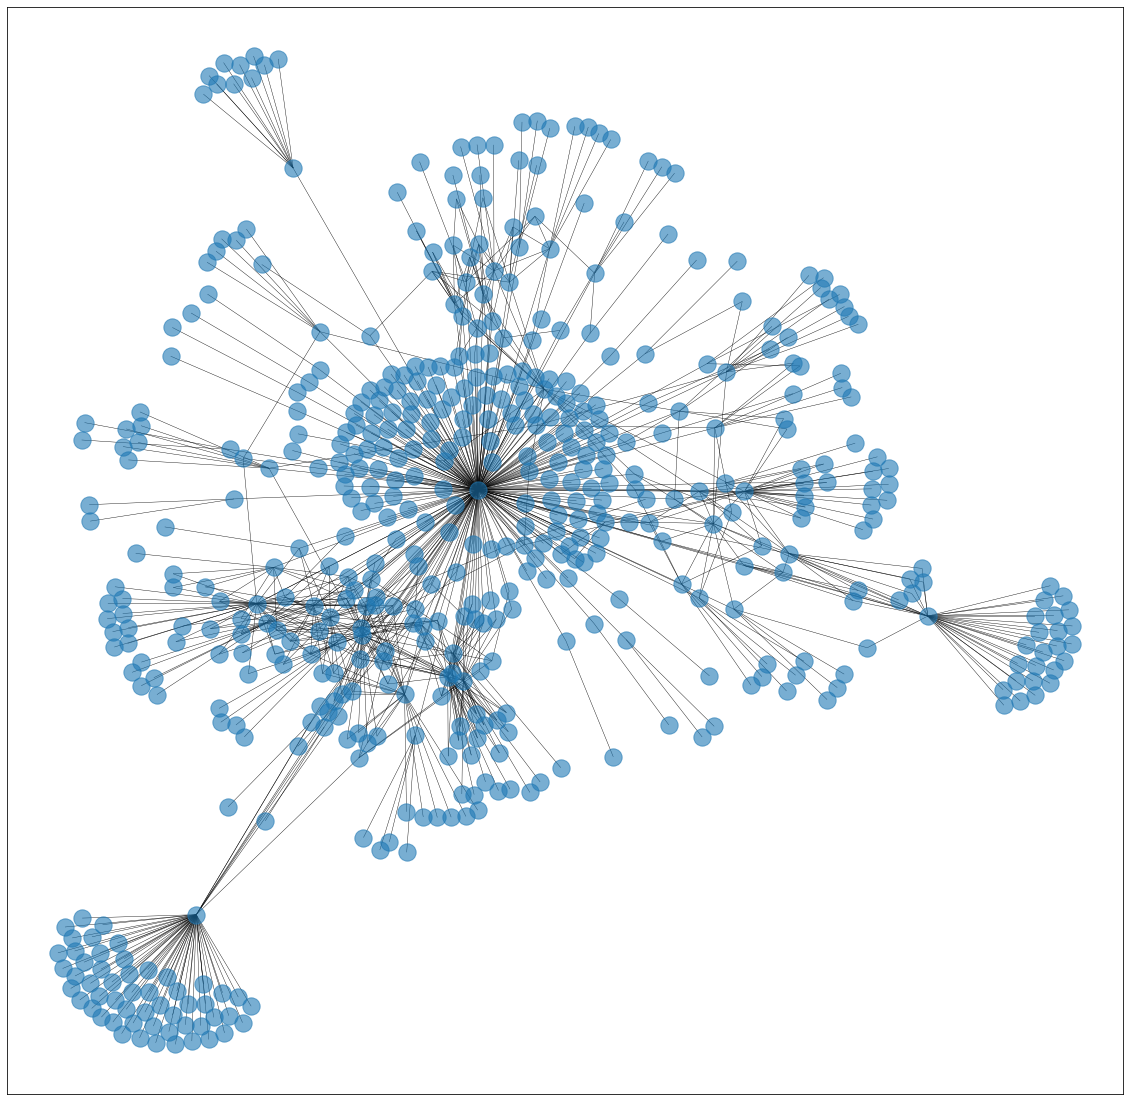

In [73]:
#граф полученных связей всех друзей и их друзей

G = nx.from_pandas_edgelist(my_friends_friends)

lcoord = nx.spring_layout(G)

plt.figure(figsize=(20,20))

nodes = nx.draw_networkx_nodes(G, pos = lcoord,
                               with_labels = False,
                               alpha = 0.6)

edges = nx.draw_networkx_edges(G, pos = lcoord, width = .4)

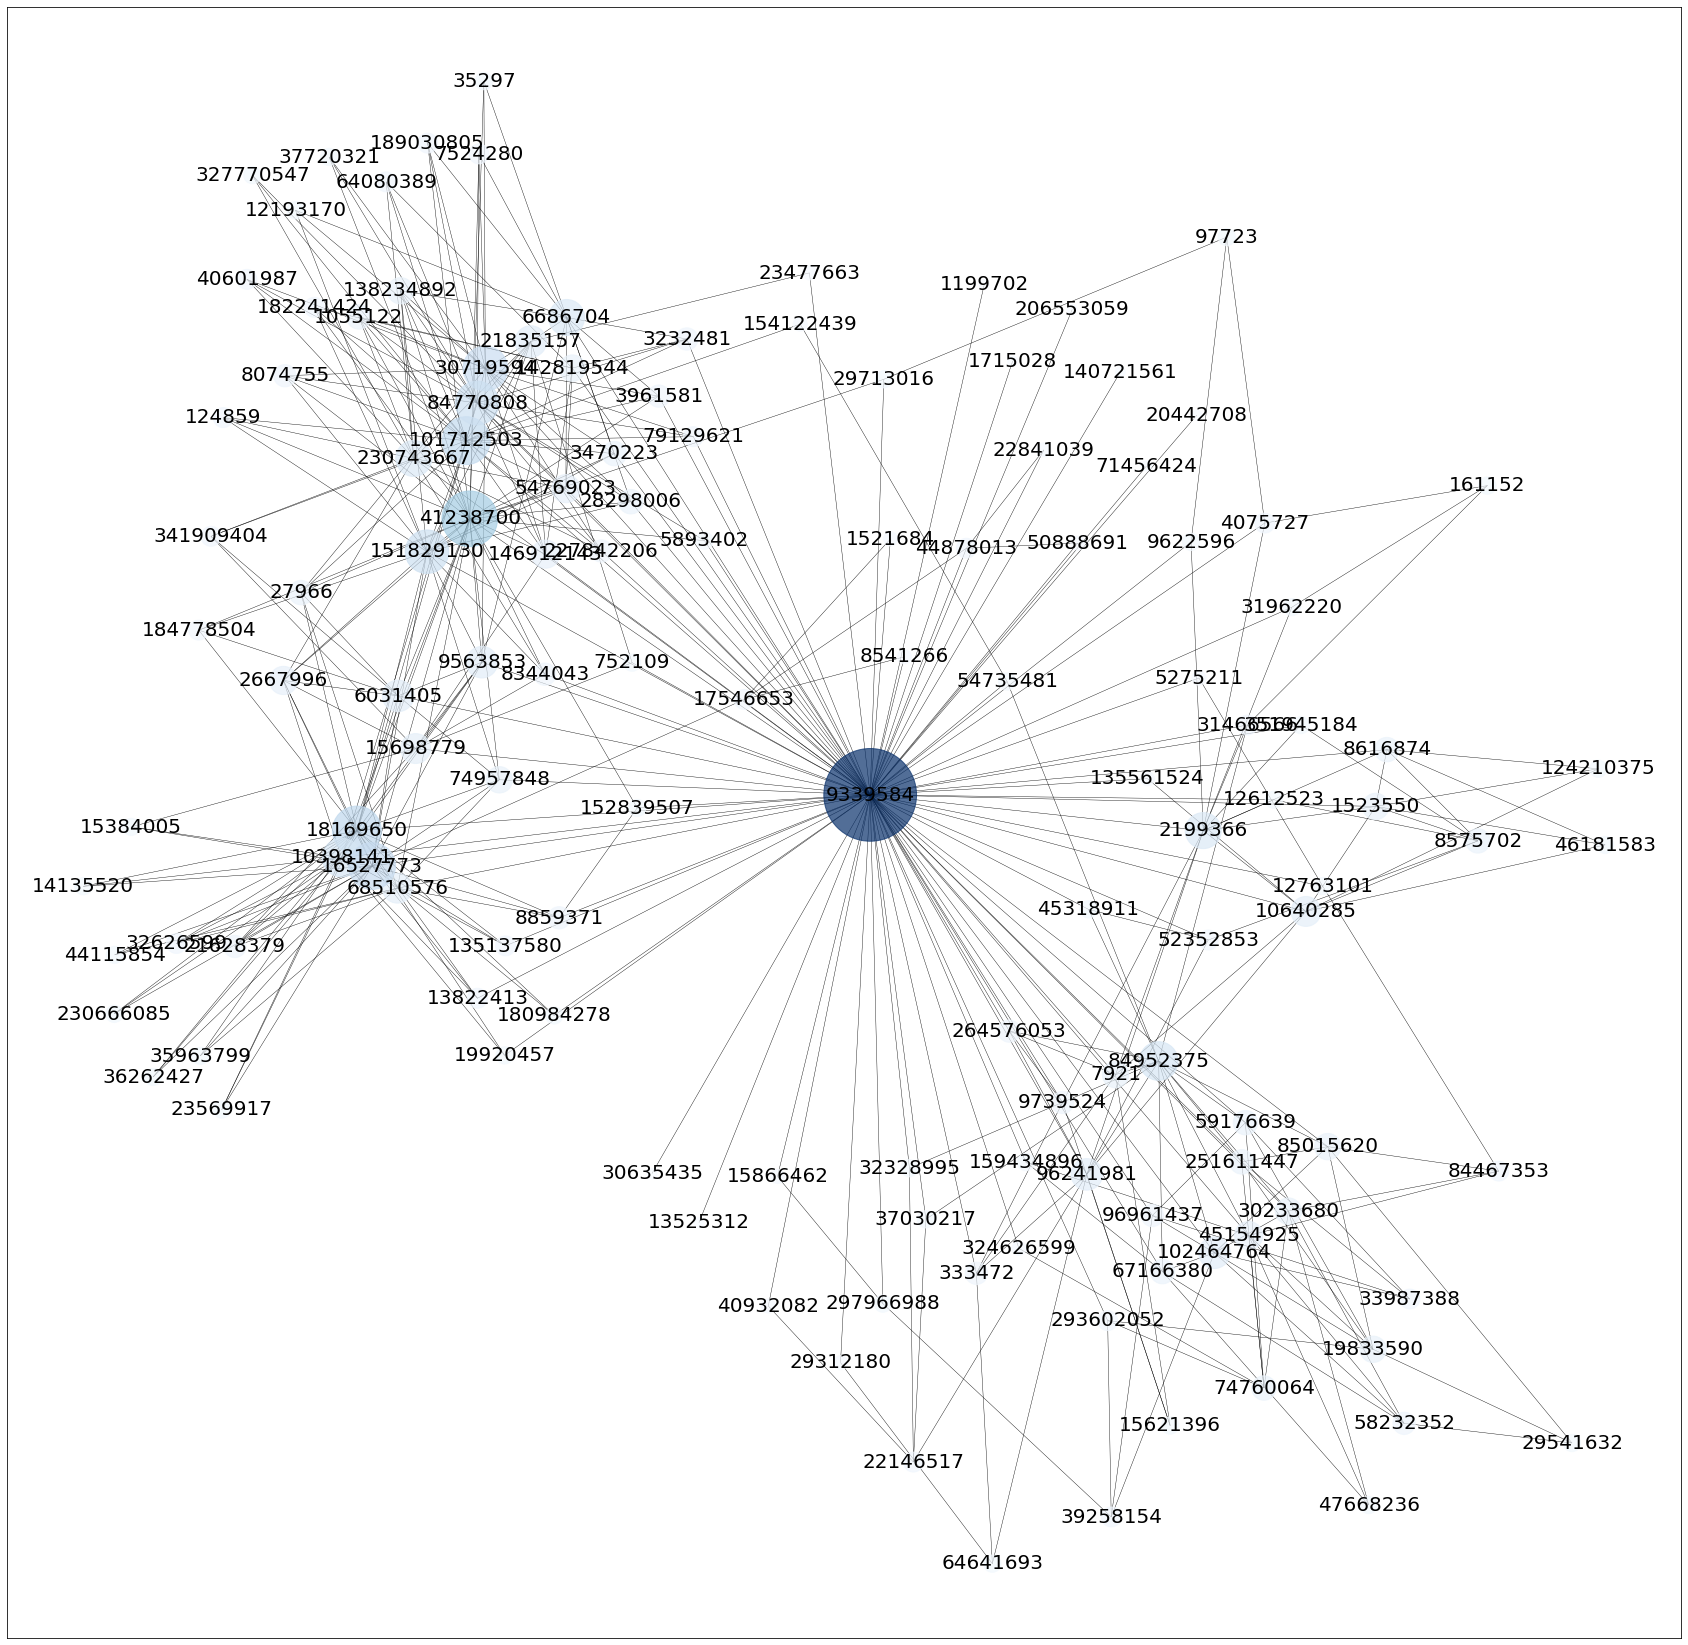

In [74]:
#строим граф
#выкидываем из графа друзей, у которых меньше 3 общих друзей
#на графе цветом и размером кружка закодированы пользователи, у которых больше всего общих друзей с моими друзьями,
#состоящими в группах выбранной тематики. Это значит: к такому человеку с большей вероятностью можно обратиться 

G = nx.from_pandas_edgelist(my_friends_friends)
k = nx.degree(G)
list_for_removal = []
for i in tqdm (G.degree, position = 0, leave = True):
    if i[1] < 3:
        list_for_removal.append(i[0])
G.remove_nodes_from(list_for_removal)

lcoord = nx.spring_layout(G)

plt.figure(figsize = (30,30))

nodes = nx.draw_networkx_nodes(G, pos = lcoord,
                               with_labels = False,
                               nodelist = list(dict(k).keys()),
                               node_size = [d * 100 for d in list(dict(k).values())],
                               node_color = list(dict(k).values()),
                               cmap = plt.cm.Blues,
                               alpha = 0.7)

edges = nx.draw_networkx_edges(G, pos = lcoord, width = .4)

labels = nx.draw_networkx_labels(G, pos = lcoord, font_size = 20)

In [75]:
nx.write_gexf(G, "friends_groups_end.gexf")

In [78]:
#пользователю предлагается узнать юзера, скрывающегося под id на графе

print('Введите id юзера с графа, чтобы узнать о нем подробнее:')
user_from_graph_id = input()


you_need_this_user_info = api.users.get(user_ids = {user_from_graph_id}, v = 5.126)


for i in you_need_this_user_info:
    if i['first_name'] == 'DELETED':
        print('Упс. Такого пользователя больше не существует. Возможно он забанен или удален')
    else:
        print('Ваш друг —', i['first_name'], i['last_name'])

Введите id юзера с графа, чтобы узнать о нем подробнее:
9339584
Ваш друг — Мария Кузнецова
